In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1. Import and store the data in a dataframe. (2.5 points)

In [9]:
df = pd.read_csv("airq402.dat.txt", 
                 sep="\s+", 
                 skiprows=0, 
                 names=["City1", "City2","Avg_Fare", "Distance", "Avg_weekly_passengers", "Mrkt_leading_airline", "Mrkt_share", 
                        "Avg_fare", "Low_price_airline", "Mrkt_share1", "Price"]
                  )
df.head()

,City1,City2,Avg_Fare,Distance,Avg_weekly_passengers,Mrkt_leading_airline,Mrkt_share,Avg_fare,Low_price_airline,Mrkt_share1,Price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1                    1000 non-null object
City2                    1000 non-null object
Avg_Fare                 1000 non-null float64
Distance                 1000 non-null int64
Avg_weekly_passengers    1000 non-null float64
Mrkt_leading_airline     1000 non-null object
Mrkt_share               1000 non-null float64
Avg_fare                 1000 non-null float64
Low_price_airline        1000 non-null object
Mrkt_share1              1000 non-null float64
Price                    1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Fare,1000.0,163.37542,55.365470,50.52,125.9750,161.345,197.3925,401.23
Distance,1000.0,1056.97300,643.203251,108.00,553.5000,919.000,1452.5000,2724.00
Avg_weekly_passengers,1000.0,672.27914,766.519254,181.41,257.1975,404.780,769.9125,8950.76
Mrkt_share,1000.0,60.12859,19.367779,17.68,46.5100,59.240,73.5100,100.00
Avg_fare,1000.0,166.64756,62.660140,50.52,124.0850,161.400,202.9775,490.03
Mrkt_share1,1000.0,34.55148,27.096999,1.06,13.1950,26.140,52.9725,100.00
Price,1000.0,143.19309,47.229184,49.61,113.7675,137.825,168.5300,387.94


In [12]:
df.shape

(1000, 11)

## 2. Remove the outliers from the data (5 points)

In [13]:
p75 = df.quantile(0.75)# q=0.75 is set for finding 75 percentile
p25 = df.quantile(0.25)# q= 0.25 is set for finding 25 percentile
df_iqr = p75 - p25
mini = p25 - 1.5*df_iqr
maxi = p75 + 1.5*df_iqr 


In [47]:
z = (df_iqr.to_frame().T.columns)

In [48]:
df1 = df[z]

In [49]:
data_df = df1[(df1 > mini) & (df1 < maxi)].dropna()
data_df.head()

,Avg_Fare,Distance,Avg_weekly_passengers,Mrkt_share,Avg_fare,Mrkt_share1,Price
0,114.47,528,424.56,70.19,111.03,70.19,111.03
1,122.47,860,276.84,75.10,123.09,17.23,118.94
2,214.42,852,215.76,78.89,223.98,2.77,167.12
3,69.40,288,606.84,96.97,68.86,96.97,68.86
4,158.13,723,313.04,39.79,161.36,15.34,145.42


In [50]:
data_df.describe()

,Avg_Fare,Distance,Avg_weekly_passengers,Mrkt_share,Avg_fare,Mrkt_share1,Price
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,160.292068,1039.383051,499.132644,60.636938,162.589051,34.373028,140.431073
std,48.468895,615.224361,327.573566,19.361447,53.288002,27.183305,39.849789
min,50.520000,108.000000,181.410000,17.680000,50.520000,1.060000,50.520000
25%,126.600000,564.000000,249.020000,47.020000,125.590000,13.060000,115.110000
50%,160.710000,914.000000,372.930000,59.750000,160.740000,26.250000,138.020000
75%,194.050000,1381.000000,644.560000,74.660000,198.470000,52.930000,166.260000
max,288.580000,2724.000000,1519.890000,100.000000,315.860000,100.000000,250.020000


## 3.Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)

In [51]:
y = data_df["Avg_Fare"] #target variable
X = data_df.drop("Avg_Fare", axis =1)  # independent variable

## 4. Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)

In [52]:
corr = (data_df.corr()['Avg_Fare'].abs() < 0.1).to_frame() 
corr

,Avg_Fare
Avg_Fare,False
Distance,False
Avg_weekly_passengers,False
Mrkt_share,False
Avg_fare,False
Mrkt_share1,False
Price,False


In [75]:
# Assuming that question meant not to consider .abs() as it returned empty array
# here we are dropping any value less than 0.1
#corr = (data_df.corr()['Avg_Fare'] < 0.1).to_frame()

In [54]:
corr

,Avg_Fare
Avg_Fare,False
Distance,False
Avg_weekly_passengers,False
Mrkt_share,False
Avg_fare,False
Mrkt_share1,False
Price,False


In [55]:
corr = corr[corr == True].dropna(axis=0)

In [56]:
corr.T.columns

Index([], dtype='object')

In [57]:
X = X.drop(corr.T.columns,axis=1)

## 5. Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)

In [58]:
import matplotlib.style
plt.style.use('classic')

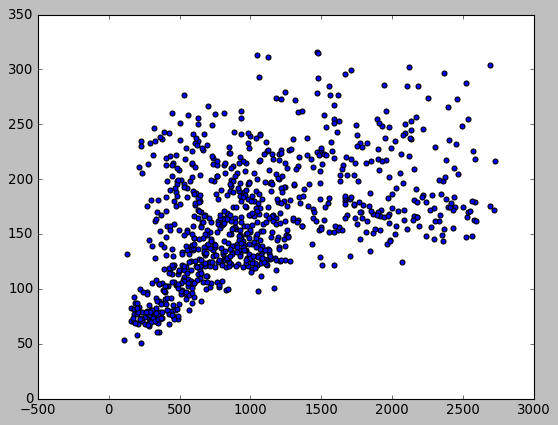

In [59]:
plt.scatter(x="Distance", y="Avg_fare", data=data_df)

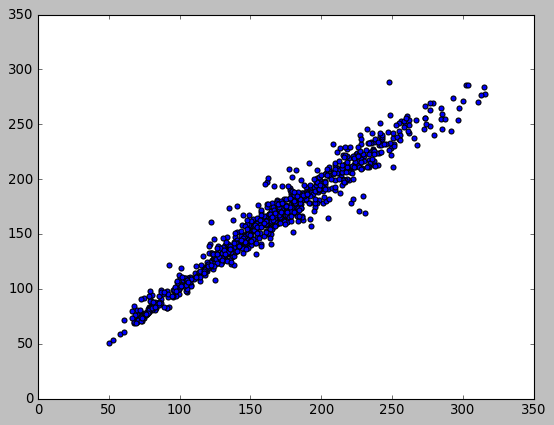

In [60]:
plt.scatter(x="Avg_fare", y="Avg_Fare", data=data_df)


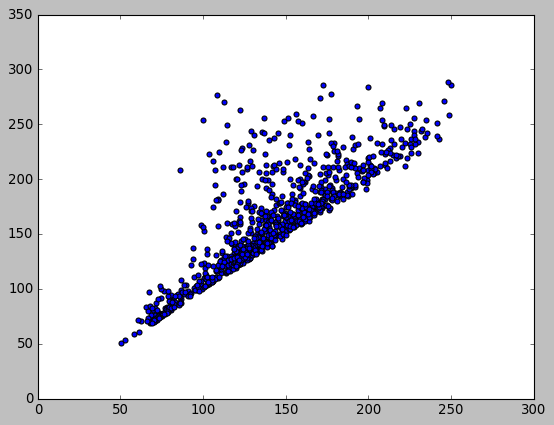

In [61]:
plt.scatter(x="Price", y="Avg_Fare", data=data_df)

## 6. Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
seed = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = seed) #test_size = 0.2 means splitting the data into 80:20 ratio.

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
# using linear regression model
model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 7. Print the coefficients & intercepts of the linear regression model (5 points)

In [66]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is: {}".format(col_name,model.coef_[idx]))

The coefficient for Distance is: 0.003125625429217904
The coefficient for Avg_weekly_passengers is: -0.003297560411396752
The coefficient for Mrkt_share is: 0.0763660162372917
The coefficient for Avg_fare is: 0.718547713233406
The coefficient for Mrkt_share1 is: -0.03349271597794551
The coefficient for Price is: 0.23794827801035592


In [67]:
print("The intercept for our model is:",model.intercept_)

The intercept for our model is: 4.765935117096404


## 8. Print the accuracy of the overall model (2.5 points)

In [68]:
model.score(X_test,y_test)

0.9683158064384999

In [69]:
# So the model explains 96.9% approx of the variability in y using X

In [70]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases
mse = np.mean((model.predict(X_test)-y_test)**2)
mse

74.52602181719455

In [71]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual
import math
math.sqrt(mse)

8.632845522606932

In [72]:
# so there is avg of 8.63 approx Avg_Fare difference from real Avg_Fare on an avg

In [73]:
y_pred = model.predict(X_test)

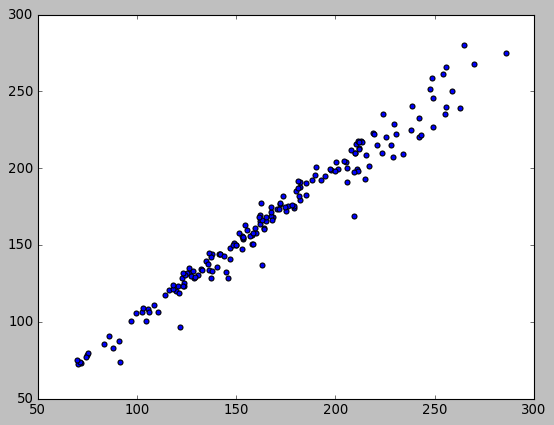

In [74]:
plt.scatter(y_test, y_pred)